In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns, warnings

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family='NanumGothic')
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df_raw = pd.read_csv('./data/jeju_data_ver1/201901-202003.csv')

In [5]:
df_raw.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [6]:
df_raw.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

#### 1, 2, 3월 데이터만 추출

In [21]:
df = df_raw[(df_raw['REG_YYMM'] == 202001) | (df_raw['REG_YYMM'] == 202002) | (df_raw['REG_YYMM'] == 202003)]
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
20425415,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,2,1,3,345000,3
20425416,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,3,1903450,3
20425417,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,14,1520500,15
20425418,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,9,1239200,9
20425419,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,606700,4


In [22]:
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']).sum().reset_index()

# Label Encoding

In [23]:
le = LabelEncoder()

In [24]:
df.drop(['HOM_SIDO_NM', 'HOM_CCG_NM'], axis=1, inplace=True)

In [25]:
categorical_cols = ['CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'AGE']

In [26]:
for col in categorical_cols:
    le = le.fit(df['{}'.format(col)])
    df['{}'.format(col)] = le.transform( df['{}'.format(col)])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234867 entries, 0 to 4234866
Data columns (total 10 columns):
 #   Column        Dtype
---  ------        -----
 0   REG_YYMM      int64
 1   CARD_SIDO_NM  int32
 2   CARD_CCG_NM   int32
 3   STD_CLSS_NM   int32
 4   AGE           int32
 5   SEX_CTGO_CD   int64
 6   FLC           int64
 7   CSTMR_CNT     int64
 8   AMT           int64
 9   CNT           int64
dtypes: int32(4), int64(6)
memory usage: 258.5 MB


In [28]:
df.REG_YYMM.unique()

array([202001, 202002, 202003], dtype=int64)

# Preprocessing

In [29]:
# 변수명 지정
X_cols = list(df.columns)
X_cols.remove('AMT')

In [30]:
X = df[X_cols]
y = df['AMT']

In [31]:
# X 변수 Scale 적용
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Random Forest

In [33]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(X_test,y_test)))

#### n_estimator : 트리 수 변경에 따른 모델 성능

In [1218]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree :
    rf = RandomForestRegressor(n_estimators= v_n_estimators)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test,y_test))

# 결과 저장

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n['Gap'] = df_score_n['TrainScore'] - df_score_n['TestScore']

In [1219]:
# 모델 설명력 확인
df_score_n.round(3).sort_values(by='Gap').head()

,n_estimators,TrainScore,TestScore,Gap
1,20,0.972,0.050,0.922
5,60,0.969,0.010,0.959
9,100,0.970,-0.094,1.064
3,40,0.975,-0.133,1.108
26,270,0.973,-0.213,1.186


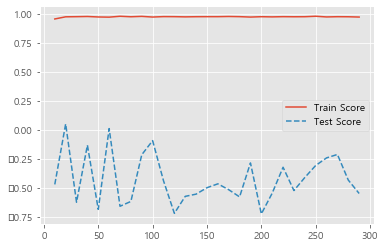

In [1220]:
# 모델 설명력 그래프 확인

plt.plot(para_n_tree, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

#### min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [1221]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestRegressor(n_estimators=20,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test,y_test))
    
# 결과 저장

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf['Gap'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']

In [1225]:
# 모델 설명력 확인
df_score_leaf.round(3).sort_values(by='Gap').head()

,MinSamplesLeaf,TrainScore,TestScore,Gap
5,6,0.891,0.274,0.617
8,9,0.867,0.188,0.679
3,4,0.926,0.070,0.857
4,5,0.915,-0.044,0.959
1,2,0.955,-0.171,1.125


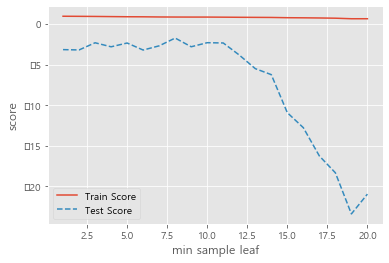

In [1163]:
# 모델 설명력 그래프 확인

plt.plot(para_leaf, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel("min sample leaf")
plt.legend()

#### min_samples_split : 분리노드의 최소 자료 수 변경에 따른 모델 성능

In [1226]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2,41)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(n_estimators=20,
                                 min_samples_leaf = 6,
                                min_samples_split = v_min_samples_split)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))
    
# 결과 저장

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split['Gap'] = df_score_split['TrainScore'] - df_score_split['TestScore']

In [1227]:
# 모델 설명력 확인
df_score_split.round(3).sort_values(by='Gap').head()

,MinSamplesSplit,TrainScore,TestScore,Gap
27,58,-0.003,-0.012,0.008
28,60,-0.001,-0.038,0.037
31,66,-0.001,-0.046,0.045
36,76,-0.000,-0.057,0.057
38,80,-0.000,-0.080,0.080


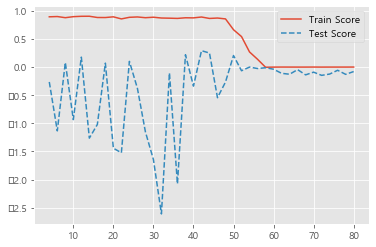

In [1228]:
# 모델 설명력 그래프 확인

plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [1229]:
# 최종 파라미터 선정
rf = RandomForestRegressor(n_estimators=70)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1230]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = X_cols
df_importance['Importance'] = rf.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3).head(20)

,Feature,Importance
12,lag1,0.419
4,OCEANIA_conf,0.261
0,EURO_conf,0.107
13,lag2,0.052
14,lag3,0.052
2,ASIA_conf,0.018
1,CHINA_conf,0.017
3,N_AMERICA_conf,0.014
5,EURO_roam,0.013
7,ASIA_roam,0.013


In [1231]:
new_importance = df_importance[df_importance['Importance'] > 0.01]

Text(0, 0.5, '변수')

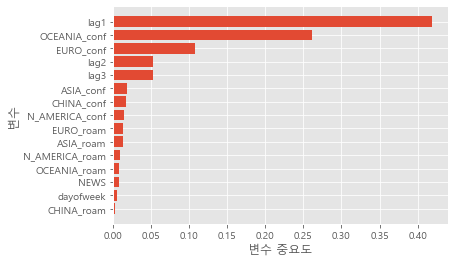

In [1232]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(15)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance1))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [1233]:
new_importance

,Feature,Importance
12,lag1,0.419043
4,OCEANIA_conf,0.261497
0,EURO_conf,0.106911
13,lag2,0.052035
14,lag3,0.052021
2,ASIA_conf,0.018497
1,CHINA_conf,0.017417
3,N_AMERICA_conf,0.014313
5,EURO_roam,0.013221
7,ASIA_roam,0.013195


# SVM Regressor

In [ ]:
svm_uncustomized = SVR()
svm_uncustomized.fit(X_train, y_train)
# Train 데이터 설명력

In [ ]:
print("Score on training set : {:.3f}".format(svm_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(svm_uncustomized.score(X_test,y_test)))